<a href="https://colab.research.google.com/github/mkatouda/mlsample/blob/main/california_housing_mlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = np.array(housing.target)

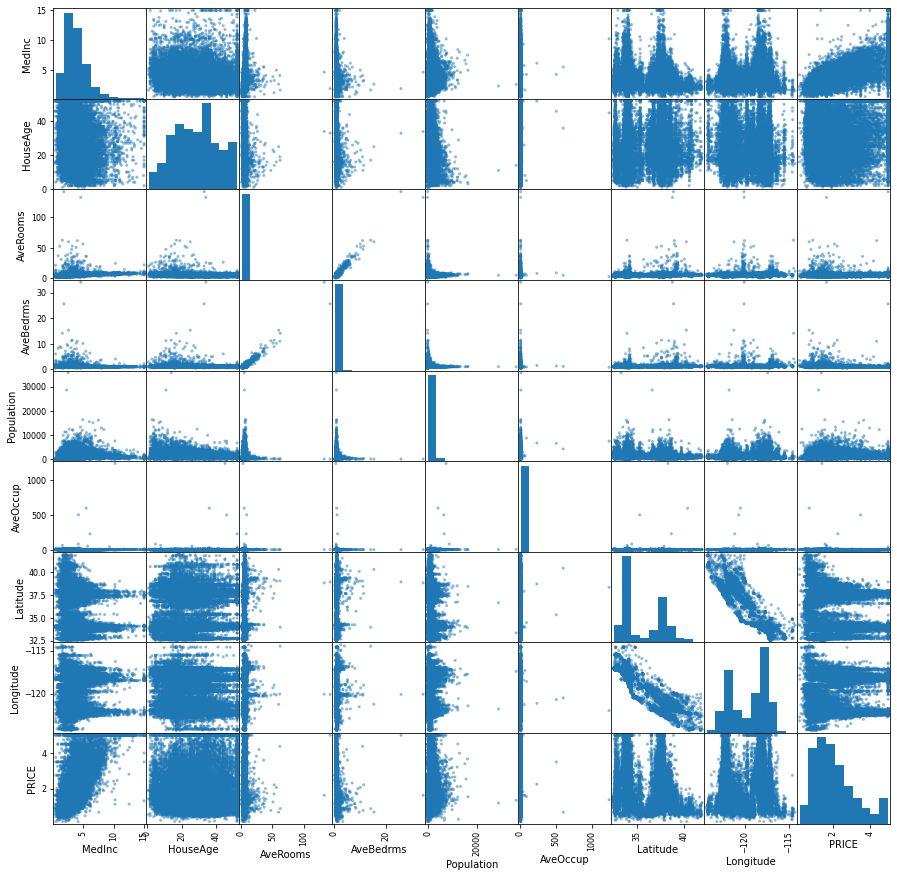

In [3]:
fig = pd.plotting.scatter_matrix(df, figsize=(15,15))

In [4]:
data = df.drop('PRICE', axis=1)
target = df.loc[:,'PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
coeff_df = pd.DataFrame()
coeff_df["Features"] = df.columns[:-1]
coeff_df["Coefficient Estimate"] = model.coef_
print(coeff_df)

     Features  Coefficient Estimate
0      MedInc              0.439091
1    HouseAge              0.009599
2    AveRooms             -0.103311
3   AveBedrms              0.616730
4  Population             -0.000008
5    AveOccup             -0.004488
6    Latitude             -0.417353
7   Longitude             -0.430614


In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 0.519, Test : 0.540
R^2 Train : 0.611, Test : 0.591


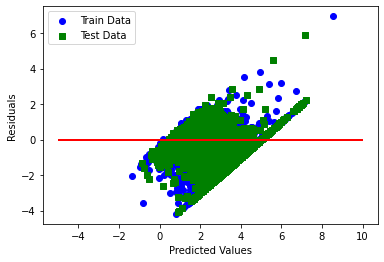

In [12]:
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'green', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y = 0, xmin = -5, xmax = 10, lw = 2, color = 'red')
plt.show()

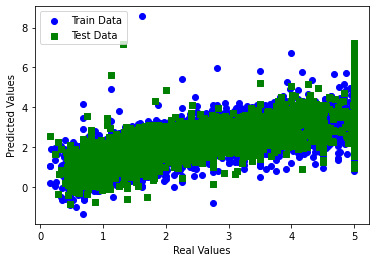

In [9]:
plt.scatter(y_train, y_train_pred, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test, y_test_pred, c = 'green', marker = 's', label = 'Test Data')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.show()